# Investigation the artifact effect of Tor's note

In this document, we try to understand that why profile B in Tor's note do not feel exhibite boundary artifact. For EM scheme, We will use the function : $$f(Z, dt):==\frac{-(Z + Drift(Z)dt)}{Diffu(Z)}=dW $$ to find the maxmium dW to reach the boundary for Z near the boundary. And then, we will compare the probability density function of dW ~ N(0, dt) to see how like get the maximum dW or less (Remember that dW is negative).

In [1]:
import numpy as np
import datetime
import threading
import multiprocessing as mp
from matplotlib import pyplot as plt
from time import time
from scipy.stats import norm
%matplotlib inline
plt.style.use('bmh')

## Diffusivity profile

In [2]:
import sympy
z = sympy.symbols('z')
dt = sympy.symbols('dt')
K0 = sympy.symbols("K0")
K1 = 6e-3  # m / s
Aalpha = 0.5
w = 0

sym_Diffu = K0 + K1 * z * sympy.exp(-Aalpha * z)
sym_dKdz = sympy.diff(sym_Diffu, z, 1)
sym_Beta = sympy.sqrt(2 * sym_Diffu)
sym_dBdz = sympy.diff(sym_Beta, z, 1)
sym_ddBdzz = sympy.diff(sym_Beta, z, 2)
sym_Alpha = w + sym_dKdz
sym_dAdz = sympy.diff(sym_Alpha, z, 1)
sym_ddAdzz = sympy.diff(sym_Alpha, z, 2)
sym_dABdz = sympy.diff(sym_Alpha * sym_Beta, z, 1)
sym_F = -(z + sym_Alpha * dt) / sym_Beta
sym_dFdz = sympy.diff(sym_F, z, 1)
sym_F_const = -(z) / sympy.sqrt(2 * 3e-3)
sym_dFdz_const = sympy.diff(sym_F_const, z, 1)

Diffu = sympy.utilities.lambdify([z, K0], sym_Diffu, np)
dKdz = sympy.utilities.lambdify([z, K0], sym_dKdz, np)
Beta = sympy.utilities.lambdify([z, K0], sym_Beta, np)
dBdz = sympy.utilities.lambdify([z, K0], sym_dBdz, np)
ddBdzz = sympy.utilities.lambdify([z, K0], sym_ddBdzz, np)
Alpha = sympy.utilities.lambdify([z, K0], sym_Alpha, np)
dAdz = sympy.utilities.lambdify([z, K0], sym_dAdz, np)
ddAdzz = sympy.utilities.lambdify([z, K0], sym_ddAdzz, np)
dABdz = sympy.utilities.lambdify([z, K0], sym_Alpha * sym_Beta, np)
F = sympy.utilities.lambdify([z, K0 ,dt], sym_F, np)
dFdz = sympy.utilities.lambdify([z, K0, dt], sym_dFdz, np)
F_const = sympy.utilities.lambdify([z, K0, dt], sym_F_const, np)
dFdz_const = sympy.utilities.lambdify([z, K0, dt], sym_dFdz_const, np)
del z, dt, K0

(0, 0.001)

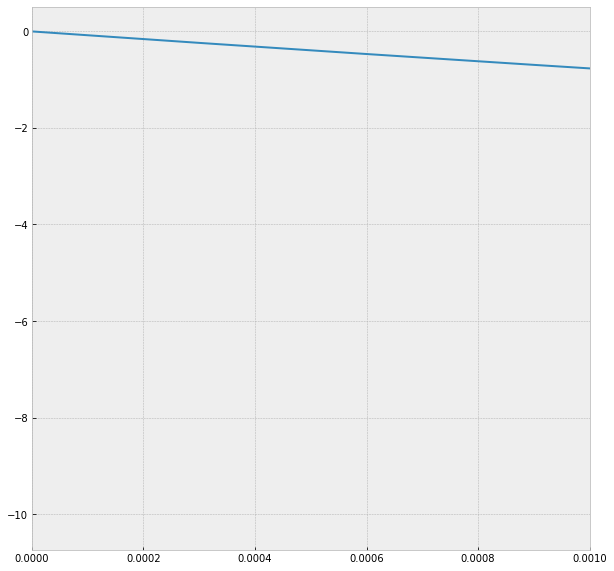

In [3]:
%matplotlib inline
K0 = 0.00019148936170212765
dt = 10
z = np.linspace(0, 0.1, 1000)
plt.figure(figsize=(10,10))
plt.plot(z, dFdz(z, K0, dt))
plt.xlim(0, 0.001)

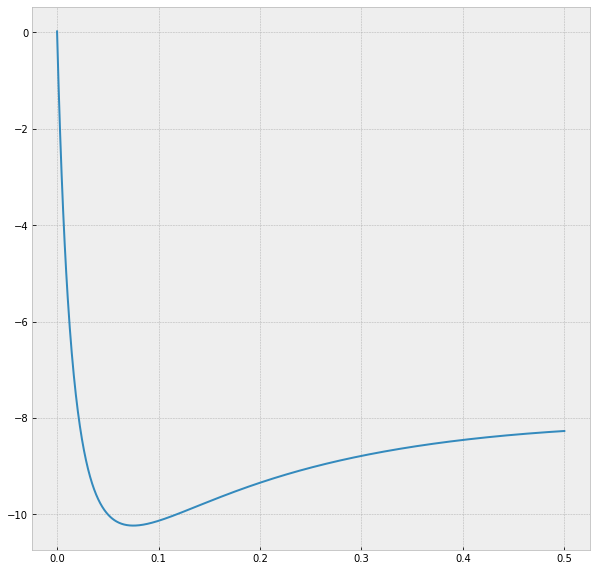

In [4]:
%matplotlib inline
K0 = 0.0001914
dt = 10
z = np.linspace(0, 0.5, 1000)
plt.figure(figsize=(10,10))
plt.plot(z, dFdz(z, K0, dt))

Text(0.5, 0, 'Z')

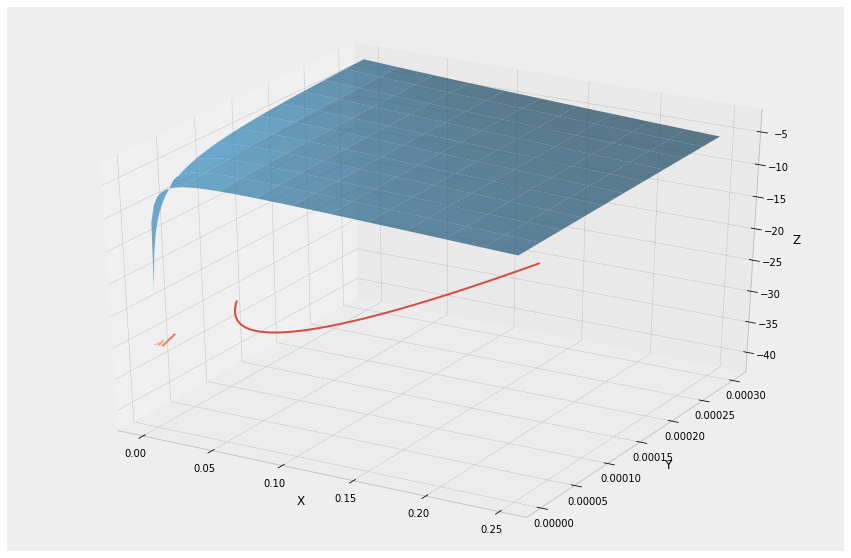

In [5]:
%matplotlib qt
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
#X, Y, Z = axes3d.get_test_data(0.05)
dt=10
X = np.linspace(0, 0.25, 100)
Y = np.linspace(1e-6, 3e-4, 100)
X, Y = np.meshgrid(X, Y)
Z = F(X,Y,dt)
Z = np.where( Z>1000, 1000,  Z)

ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7)

cset = ax.contour(X, Y, Z, 10, zdir='z', offset=-30, cmap=cm.coolwarm)
ax.clabel(cset, inline=20, fontsize=10)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.set_zlim(-1, 100)

#ax.set_zlim(-100, 40)

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

(-1, 100)

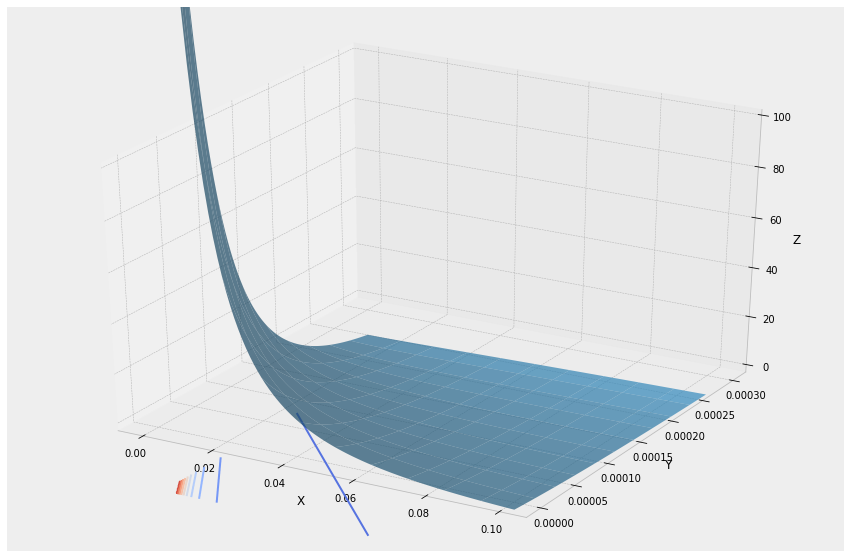

In [6]:
%matplotlib qt
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
#X, Y, Z = axes3d.get_test_data(0.05)
dt=10
X = np.linspace(0, 0.1, 100)
Y = np.linspace(1e-6, 3e-4, 100)
X, Y = np.meshgrid(X, Y)
Z = dFdz(X,Y,dt)
Z = np.where( Z>1000, 1000,  Z)

ax.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7)

cset = ax.contour(X, Y, Z, 10, zdir='z', offset=-30, cmap=cm.coolwarm)
ax.clabel(cset, inline=20, fontsize=10)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim(-1, 100)

#ax.set_zlim(-100, 40)

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

<a list of 1 text.Text objects>

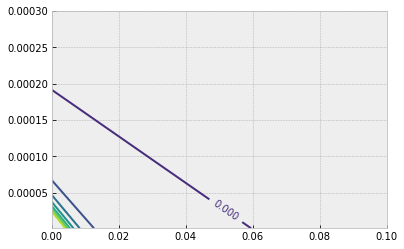

In [7]:
%matplotlib qt
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
dt=10
X = np.linspace(0, 0.1, 100)
Y = np.linspace(1e-6, 3e-4, 100)
X, Y = np.meshgrid(X, Y)
Z = dFdz(X,Y,dt)
Z = np.where( Z>1000, 1000,  Z)

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=20, fontsize=10)

#ax.set_zlim(-100, 40)

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

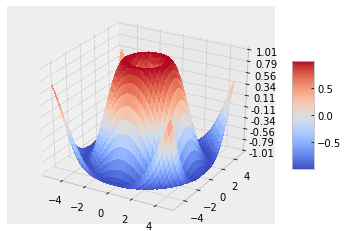

In [8]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
z = 0
K0 = 0
dt = 10
Kc = Alpha(z, K0) * (Alpha(z, K0) * dt +
                      z) / (2 * (dAdz(z, K0) * dt + 1)) - Diffu(z, K0)
print(Kc)

0.00019148936170212765


In [6]:
# Liberary
import numpy as np
from scipy.interpolate import CubicSpline
import datetime
import threading
import multiprocessing as mp
from matplotlib import pyplot as plt
from time import time
from scipy.stats import norm
%matplotlib inline
plt.style.use('bmh')

In [7]:
import sympy
z = sympy.symbols('z')
dt = sympy.symbols('dt')

K0 = 0.00019148936170212765
K1 = 6e-3  # m / s
Aalpha = 0.5
c = 10
w = 0

sym_Diffu = K0 + K1 * z * sympy.exp(-Aalpha * z)
sym_dKdz = sympy.diff(sym_Diffu, z, 1)
sym_Beta = sympy.sqrt(2 * sym_Diffu)
sym_dBdz = sympy.diff(sym_Beta, z, 1)
sym_ddBdzz = sympy.diff(sym_Beta, z, 2)
sym_Alpha = w + sym_dKdz
sym_dAdz = sympy.diff(sym_Alpha, z, 1)
sym_ddAdzz = sympy.diff(sym_Alpha, z, 2)
sym_dABdz = sympy.diff(sym_Alpha * sym_Beta, z, 1)
sym_F = -(z + sym_Alpha*dt)/sym_Beta
sym_dFdz = sympy.diff(sym_F, z, 1)
sym_F_const = -(z)/sympy.sqrt(2*3e-3)
sym_dFdz_const = sympy.diff(sym_F_const, z, 1)

Diffu  =  sympy.utilities.lambdify(z,          sym_Diffu,np)
dKdz   =  sympy.utilities.lambdify(z,          sym_dKdz,np)
Beta   =  sympy.utilities.lambdify(z,          sym_Beta,np)
dBdz   =  sympy.utilities.lambdify(z,          sym_dBdz,np)
ddBdzz=  sympy.utilities.lambdify(z,          sym_ddBdzz,np)
Alpha =  sympy.utilities.lambdify(z,      sym_Alpha,np)
dAdz  =  sympy.utilities.lambdify(z,      sym_dAdz,np)
ddAdzz=  sympy.utilities.lambdify(z,      sym_ddAdzz,np)
dABdz =  sympy.utilities.lambdify(z, sym_Alpha*sym_Beta,np)
F = sympy.utilities.lambdify([z, dt], sym_F,np)
dFdz = sympy.utilities.lambdify([z, dt], sym_dFdz,np)
F_const = sympy.utilities.lambdify([z, dt], sym_F_const,np)
dFdz_const = sympy.utilities.lambdify([z, dt], sym_dFdz_const,np)
del z, dt

#######
#Euler#
#######
def step_e(z,H,dt,N_sample):

    dW=np.random.normal(0,np.sqrt(dt),N_sample)
    a=dKdz(z)
    b=np.sqrt(2*Diffu(z))
    temp=z+a*dt+b*dW
    return temp

def step_e_const(z,H,dt,N_sample):
    
    dW=np.random.normal(0,np.sqrt(dt),N_sample)
    K0=3e-3
    b=np.sqrt(2*K0)
    
    temp=z+b*dW
    return temp

In [8]:
# Parallel functions

def oneStep(Z ,scheme, H, dt):
    
    Z_Origin = Z.copy()
    Z = scheme(Z, H, dt, Z.size)
    
    maskCross = ((H < Z) | (0 > Z)) 
    Crossing = Z_Origin[maskCross]
    
    Z = np.where(Z < 0, -Z, Z)
    Z = np.where(Z > H, 2*H - Z, Z)
    
    Landing = Z[maskCross]
    
    return Z, Crossing, Landing

def parallel(Tmax, dt, H, Testdepth, Np, Nbins, quene, queneCross, queneLand,
             scheme):

    np.random.seed()
    Ntime = int(Tmax / dt)

    hist_ = np.zeros((Nbins - 1, ), 'uint64')
    hist_Cross = np.zeros((Nbins - 1, ), 'uint64')
    hist_Land = np.zeros((Nbins - 1, ), 'uint64')

    #z = np.linspace(0, H, int(Np))
    z = np.random.uniform(0, H, int(Np))

    temp0, _ = np.histogram(z, bins=np.linspace(0, Testdepth, Nbins))
    hist_ = hist_ + temp0
    
    for i in range(Ntime):

        z, Cross, Land = oneStep(z, scheme, H, dt)

        #Adding the histogram
        ###
        temp0, _ = np.histogram(z, bins=np.linspace(0, Testdepth, Nbins))
        hist_ = hist_ + temp0

        temp2, _ = np.histogram(Cross, bins=np.linspace(0, Testdepth, Nbins))
        hist_Cross = hist_Cross + temp2

        temp3, _ = np.histogram(Land, bins=np.linspace(0, Testdepth, Nbins))
        hist_Land = hist_Land + temp3
        
        try:
            if (i % int(Ntime / 100) == 0):
                print("\r %6.2f" % (i * 100 / Ntime + 1),
                      "%",
                      end="\r",
                      flush=True)
        except ZeroDivisionError as err:
            None
            
    quene.put(hist_)
    queneCross.put(hist_Cross)
    queneLand.put(hist_Land)

    return None

def RunSimulation(NumberOfThread, Tmax, dt, H, Testdepth, Np, Nbins, scheme):
    print("Total number of process: ", NumberOfThread)
    SubNp = np.full((NumberOfThread, ), int(Np / NumberOfThread))
    SubNp[-1] = SubNp[-1] + (Np % NumberOfThread)
    
    Ntime = int(Tmax / dt)  #Number of time interval

    if (__name__ == '__main__'):

        threads = []
        quene = mp.Queue()
        queneCross = mp.Queue()
        queneLand = mp.Queue()

        for i in range(NumberOfThread):
            thread = mp.Process(target=parallel,
                                args=(Tmax, dt, H, Testdepth, SubNp[i], Nbins,
                                      quene, queneCross, queneLand, scheme))

            threads.append(thread)
            thread.start()  #starting calculation.

        for thread in threads:
            thread.join()  #waiting these processes finish.

    hist_ = np.zeros((Nbins - 1, ), 'float64')
    hist_Cross = np.zeros((Nbins - 1, ), 'float64')
    hist_Land = np.zeros((Nbins - 1, ), 'float64')

    for i in range(NumberOfThread):
        hist_ += quene.get()
        hist_Cross += queneCross.get()
        hist_Land += queneLand.get()
        
    bins = np.linspace(0, Testdepth, Nbins)
    dz = bins[1] - bins[0]
    hist_ = (hist_*H) / (Np * dz * (Ntime+1))
    
    midpoints = bins[:-1] + (bins[1]-bins[0]) / 2
    hist_Cross = hist_Cross / (np.sum(hist_Cross)*(midpoints[1]-midpoints[0]))
    hist_Land = hist_Land / (np.sum(hist_Land)*(midpoints[1]-midpoints[0]))

    return hist_, hist_Cross, hist_Land

In [9]:
Np = 240000
Nbins = 200
dt = 10
Tmax = dt * 3 * 3600
H = 10
Testdepth = 0.7
NumberOfThread = 4

startTime = time()
E1, E1_Cross, E1_Land = RunSimulation(NumberOfThread, Tmax, dt, H, Testdepth,
                                      Np, Nbins, step_e)
endTime = time()
print("Time elapsed: ", endTime - startTime)

startTime = time()
E1_Const, E1_Const_Cross, E1_Const_Land = RunSimulation(
    NumberOfThread, Tmax, dt, H, Testdepth, Np, Nbins, step_e_const)
endTime = time()
print("Time elapsed: ", endTime - startTime)

Total number of process:  4
Time elapsed:  155.13347268104553
Total number of process:  4
Time elapsed:  108.15106415748596


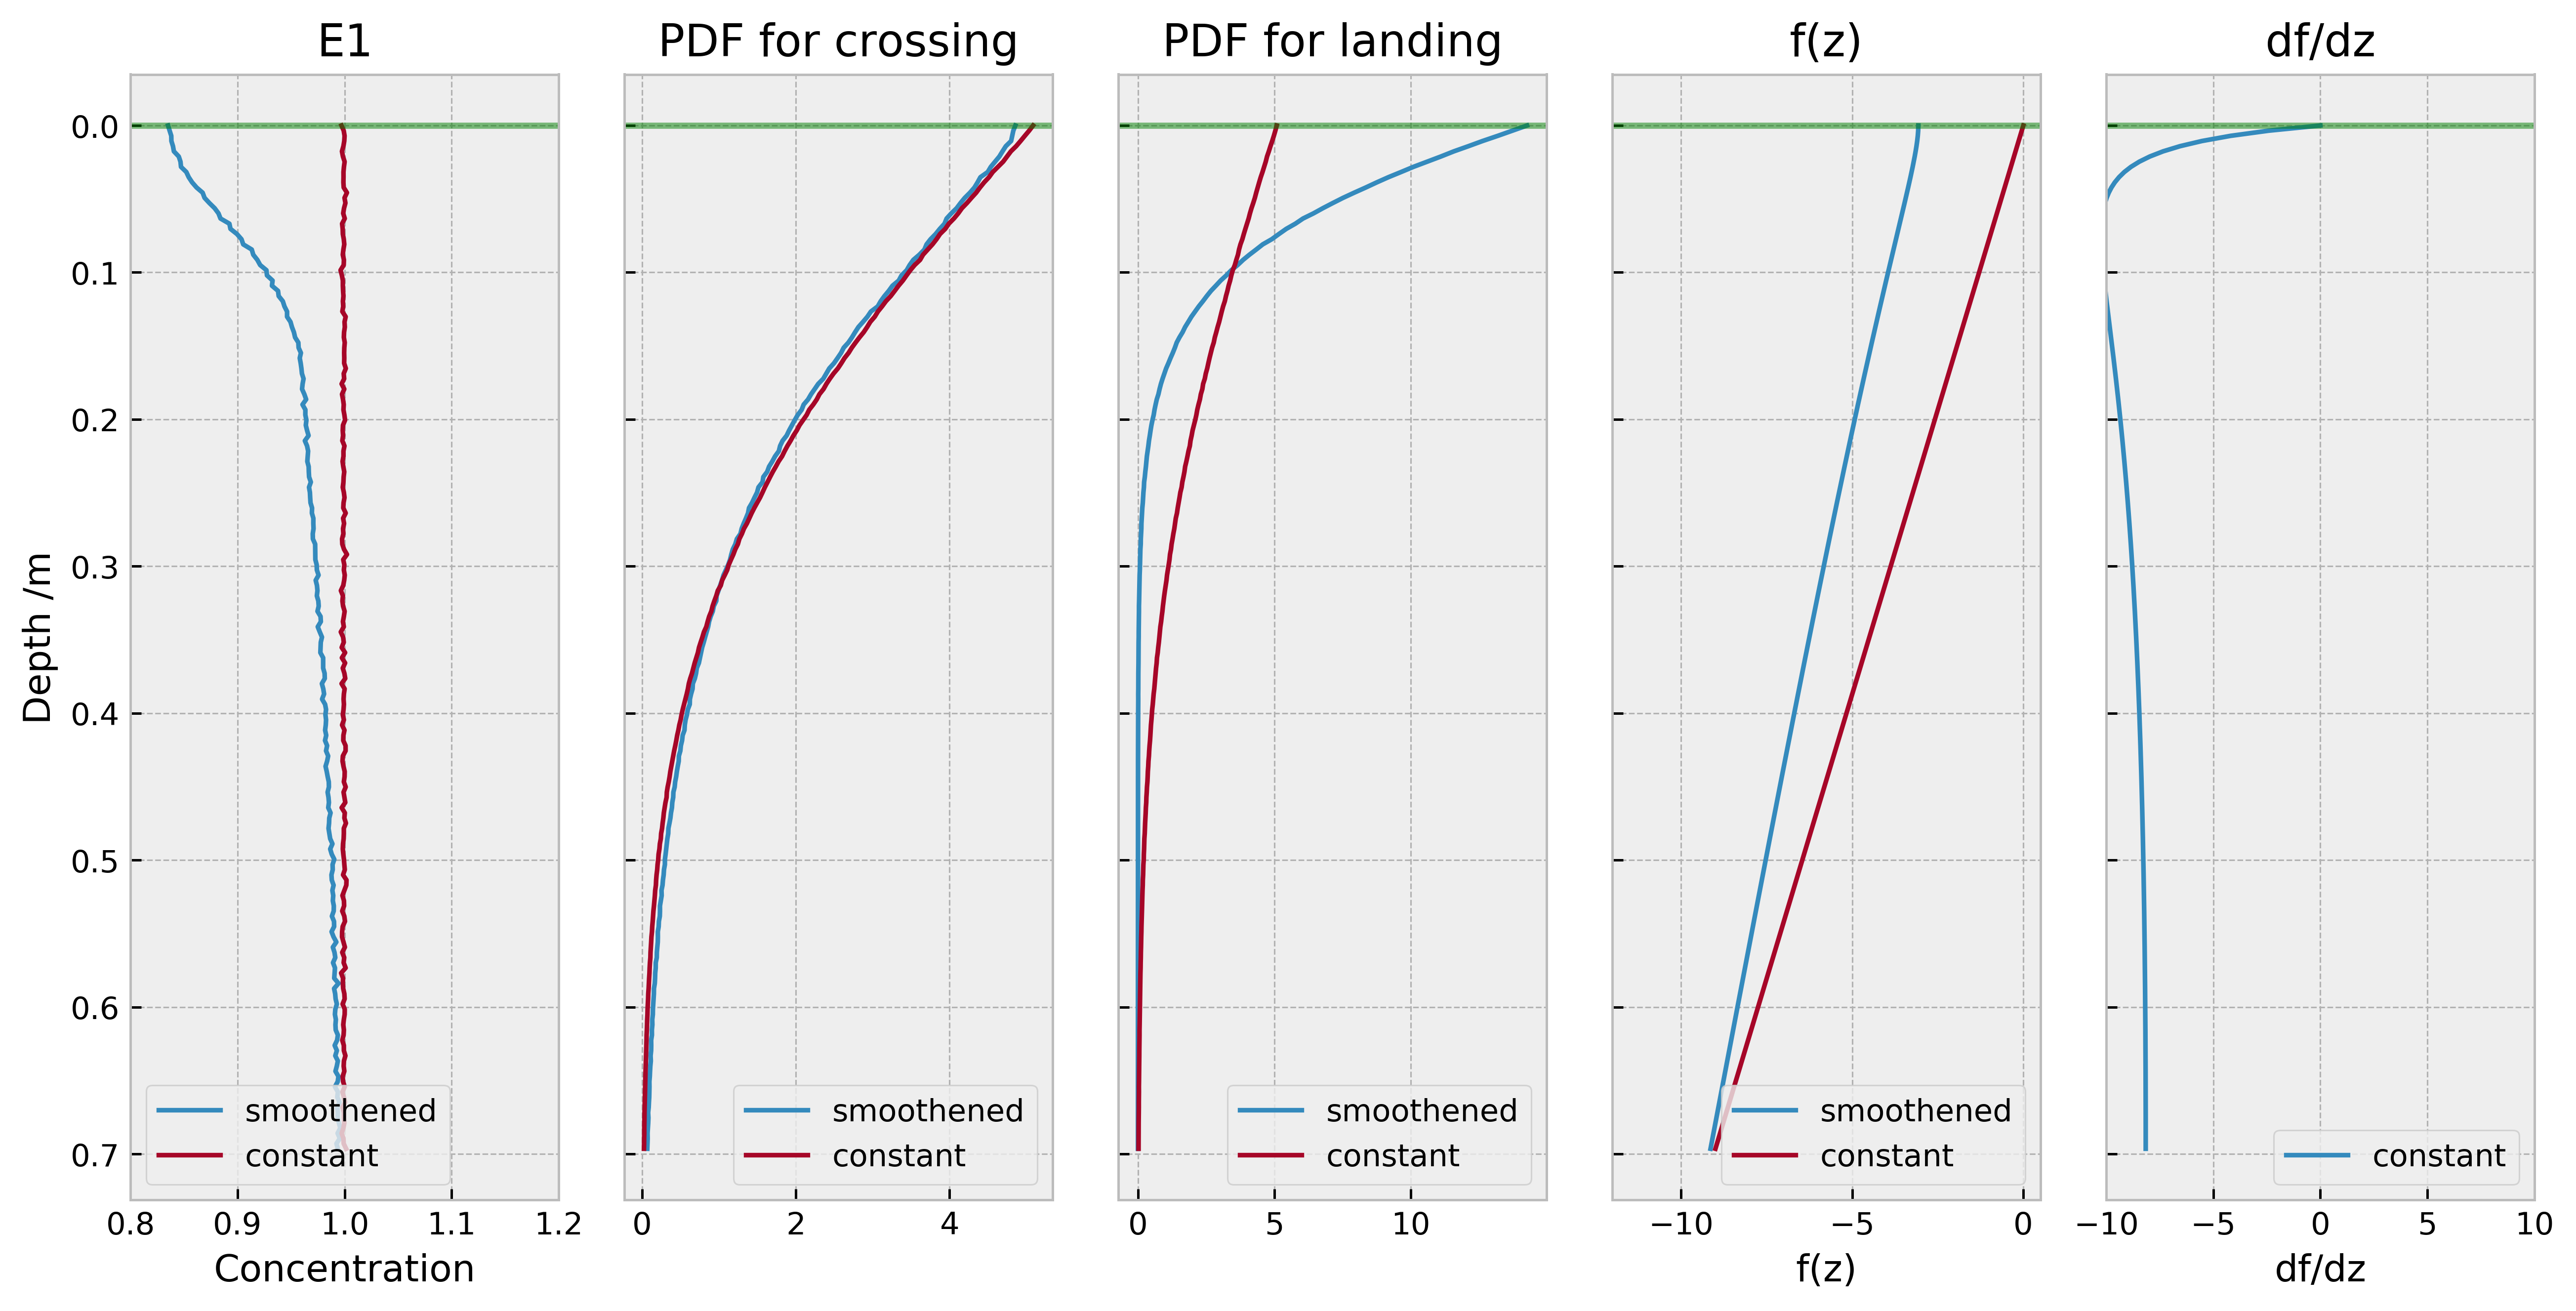

In [11]:
bins = np.linspace(0, Testdepth, Nbins)
midpoints = bins[:-1]

fig, ax = plt.subplots(ncols = 5, figsize = (11.69,6), sharey = True, dpi = 450)
ax[0].plot(E1, midpoints, linewidth=1.5, label= "smoothened")
ax[0].plot(E1_Const, midpoints, linewidth=1.5, label= "constant")
ax[0].axhline(0.0, color="g", lw=2, alpha = 0.5)
ax[0].set_xlabel('Concentration')
ax[0].set_ylabel('Depth /m')
ax[0].set_xlim(0.8, 1.2)
ax[0].set_title('E1')
ax[0].invert_yaxis()
ax[0].legend(loc=3)

ax[1].plot(E1_Cross, midpoints, linewidth=1.5, label= "smoothened")
ax[1].plot(E1_Const_Cross, midpoints, linewidth=1.5, label= "constant")
ax[1].axhline(0.0, color="g", lw=2, alpha = 0.5)
ax[1].set_xlabel("")
ax[1].set_title("PDF for crossing")
ax[1].legend()

ax[2].plot(E1_Land, midpoints, linewidth=1.5, label= "smoothened")
ax[2].plot(E1_Const_Land, midpoints, linewidth=1.5, label= "constant")
ax[2].axhline(0.0, color="g", lw=2, alpha = 0.5)
ax[2].set_xlabel("")
ax[2].set_title("PDF for landing")
ax[2].legend()

ax[3].plot(F(midpoints,dt), midpoints, linewidth=1.5, label= "smoothened")
ax[3].plot(F_const(midpoints,dt), midpoints, linewidth=1.5, label= "constant")
ax[3].axhline(0.0, color="g", lw=2, alpha = 0.5)
ax[3].set_xlabel("f(z)")
ax[3].set_title("f(z)")
ax[3].set_xlim(-12, 0.5)
ax[3].legend()

ax[4].plot(dFdz(midpoints,dt), midpoints, linewidth=1.5, label= "constant")
ax[4].axhline(0.0, color="g", lw=2, alpha = 0.5)
ax[4].set_xlabel('df/dz')
ax[4].set_title("df/dz")
ax[4].set_xlim(-10, 10)
ax[4].legend()

plt.tight_layout()